In [1]:
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
teams = {}
with open('../phase1/crawlers/team_data_league.csv') as f:
    reader = csv.DictReader(f)
    for row in reader:
        if row['year'] == '2021':
            teams[row['team_name']] = int(row['goal_difference'])

FileNotFoundError: [Errno 2] No such file or directory: '../phase1/crawlers/team_data_league.csv'

In [8]:
need_striker = sorted(teams.items(), key=lambda x: x[1])

x = [y[1] for y in need_striker[:15]]
y = [x[0] for x in need_striker[:15]]

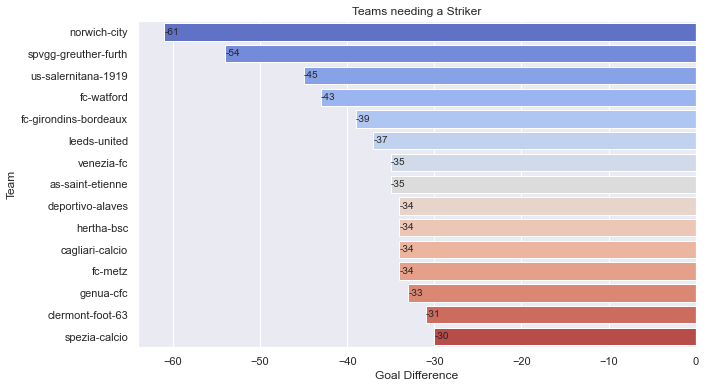

In [9]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(10,6)})
cmap = sns.color_palette("YlOrBr", as_cmap=True)
sns.barplot(x=x, y=y, orient='horizontal', palette="coolwarm")
plt.ylabel('Team')
plt.yticks(range(15), y)
plt.xlabel('Goal Difference')
plt.title('Teams needing a Striker')

for i, (value, name) in enumerate(zip(x, y)):
    plt.annotate(value, (value, i), ha='left', va='center', fontsize=10)

plt.show()

In [10]:
data = pd.read_csv('../phase1/crawlers/transfer_history_edited_df.csv')
data['mv'] = pd.to_numeric(data['mv'], errors='coerce')
data['fee'] = pd.to_numeric(data['fee'], errors='coerce')
data = data.dropna(subset=['mv', 'fee'])
data = data[data['year'] >= 2017]

In [11]:
mv_by_season = data.groupby('year')['mv'].mean()
fee_by_season = data.groupby('year')['fee'].mean()

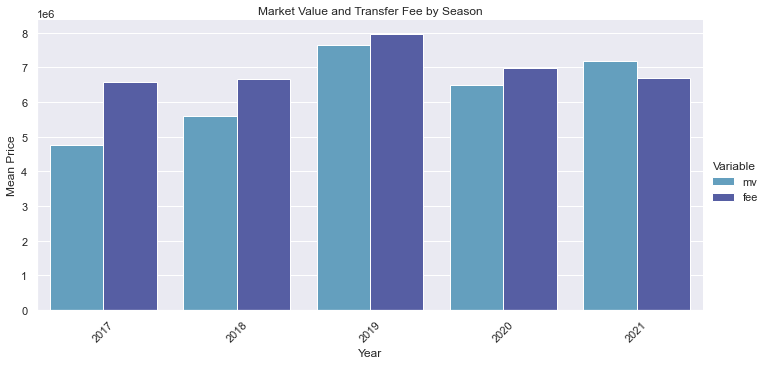

In [12]:
df = pd.concat([mv_by_season, fee_by_season], axis=1).reset_index().melt(id_vars='year', var_name='Variable', value_name='Value')

sns.set_style("darkgrid")
sns.set_palette("icefire")
g = sns.catplot(data=df, x="year", y="Value",kind='bar', hue='Variable', height=5, aspect=2)
g.set_axis_labels('Year', 'Mean Price')
g.set(title='Market Value and Transfer Fee by Season')
plt.xticks(rotation=45)
plt.show()